In [12]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import os
import cv2


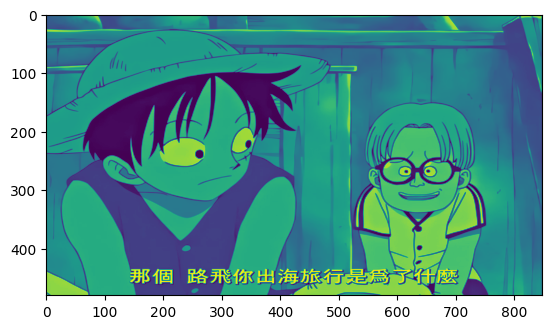

In [51]:
im1 = cv2.imread("./datasets/test_input_frames/0000000001.png", 0)
im2 = cv2.imread("./datasets/test_input_frames/0000000002.png", 0)
im3 = cv2.imread("./datasets/test_input_frames/0000000003.png", 0)
im100 = cv2.imread("./datasets/test_input_frames/0000000100.png", 0)


plt.imshow(im1)

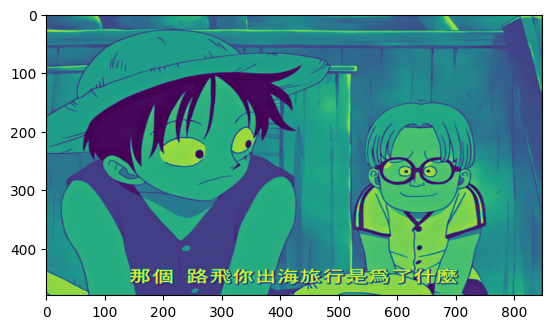

In [52]:
plt.imshow(im2)

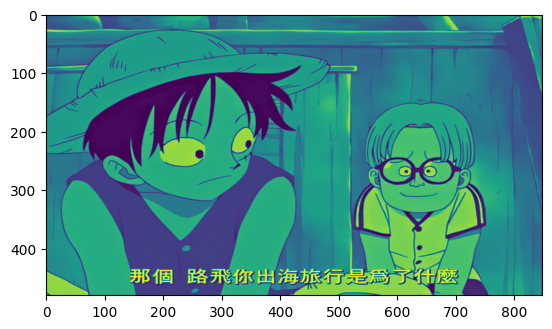

In [53]:
plt.imshow(im3)

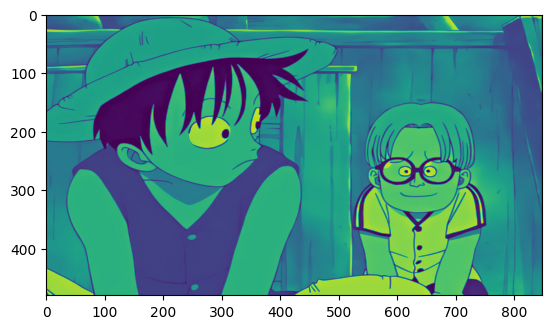

In [55]:
plt.imshow(im100)

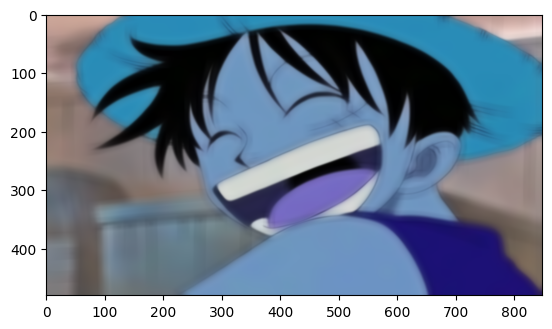

In [64]:
plt.imshow(cv2.fastNlMeansDenoising(image1, None, 100, 7, 21))

In [66]:
def get_similarity(image1, image2):
#     hist1, _ = np.histogram(cv2.GaussianBlur(image1,blur,cv2.BORDER_DEFAULT), 255)

#     hist2, _ = np.histogram(cv2.GaussianBlur(image2,blur,cv2.BORDER_DEFAULT), 255)

#     blur=(5,5)

#     image1_blurred = cv2.GaussianBlur(image1,blur,cv2.BORDER_DEFAULT)

#     image2_blurred = cv2.GaussianBlur(image2,blur,cv2.BORDER_DEFAULT)

    width = image1.shape[0]
    height = image1.shape[1]

#     strength = 100
    
#     image1_denoised = cv2.fastNlMeansDenoising(image1, None, strength, 7, 21)
#     image2_denoised = cv2.fastNlMeansDenoising(image2, None, strength, 7, 21)
    
    errorL2 = cv2.norm(image1, image2, cv2.NORM_L2 )
    similarity = 1 - errorL2 / ( height * width )
    
    return similarity
    
print(get_similarity(im1, im2))
print(get_similarity(im2, im3))
print(get_similarity(im3, im100))


0.9942562635241808
0.9995364332195308
0.9275355196202182


In [31]:
input_path = os.path.join("./datasets/test_input_frames/")
filenames = sorted(os.listdir(input_path))

file_paths = [os.path.join(input_path, filename) for filename in filenames]

In [71]:
similarity_threshold = 0.995

for i in range(len(file_paths)-1):
    image1 = cv2.imread(file_paths[i], 0)
    image2 = cv2.imread(file_paths[i+1], 0)
    
    similarity = get_similarity(image1, image2)
    
    print(1-similarity)
    
    if get_similarity(image1, image2) < similarity_threshold:
        print(i+1, "->", i+2, True)
    else:
        print(i+1, "->", i+2, False)

0.005743736475819161
1 -> 2 True
0.0004635667804692156
2 -> 3 False
0.0004464550586320559
3 -> 4 False
0.006976580119508413
4 -> 5 True
0.0010509339023312414
5 -> 6 False
0.0006333632794319755
6 -> 7 False
0.006891378404762283
7 -> 8 True
0.0008418771892999555
8 -> 9 False
0.0009254491860867242
9 -> 10 False
0.006900570676652729
10 -> 11 True
0.0004886299392067306
11 -> 12 False
0.0007270144868409822
12 -> 13 False
0.006919982324084639
13 -> 14 True
0.0005390673346761243
14 -> 15 False
0.0007106921704004288
15 -> 16 False
0.006957421381122653
16 -> 17 True
0.0007456057163494068
17 -> 18 False
0.0005495077494137579
18 -> 19 False
0.007212586728179149
19 -> 20 True
0.0005518149922665305
20 -> 21 False
0.0006224920462886141
21 -> 22 False
0.006946712328942728
22 -> 23 True
0.0006768231662005464
23 -> 24 False
0.0005281464792850077
24 -> 25 False
0.006934019382912715
25 -> 26 True
0.0006093361644270434
26 -> 27 False
0.0008220903823128456
27 -> 28 False
0.005821041046694897
28 -> 29 True
0

In [77]:
keyframe_threshold = 0.995

keyframe_mask = [True]
for i in range(1, len(file_paths)-1):
    prev_frame = cv2.imread(file_paths[i-1], 0)
    this_frame = cv2.imread(file_paths[i], 0)
    
    if get_similarity(prev_frame, this_frame) < keyframe_threshold:
        keyframe_mask.append(True)
    else:
        keyframe_mask.append(False)

keyframe_mask.append(True)
        
print(keyframe_mask)
print(len(keyframe_mask))

[True, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, True, False, True, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, Fals

In [91]:
interpolation_threshold = 0.95

max_intermediary_frames = 5

def get_next_keyframe_num(keyframe_mask):
    for i in range(1, len(keyframe_mask)):
        if keyframe_mask[i]:
            yield i

prev_keyframe_num = 0
prev_keyframe = cv2.imread(file_paths[0], 0)
interpolate_mask = [False]
for keyframe_num in get_next_keyframe_num(keyframe_mask):
    print("keyframe_num", keyframe_num+1)
    num_intermediary_frames = keyframe_num - prev_keyframe_num - 1
    print("num_intermediary_frames", num_intermediary_frames)
    
    this_keyframe = cv2.imread(file_paths[keyframe_num], 0)

    interpolate = False
    if num_intermediary_frames > 0 and num_intermediary_frames <= max_intermediary_frames:
        if get_similarity(prev_keyframe, this_keyframe) > interpolation_threshold:
            interpolate = True
        else:
            print(f"Not interpolating: {prev_keyframe_num+1} -> {keyframe_num+1}")
    
    interpolate_mask += [interpolate for _ in range(num_intermediary_frames)]
    print("interpolate_mask", [interpolate for _ in range(num_intermediary_frames)])

    prev_keyframe_num = keyframe_num
    prev_keyframe = this_keyframe
    interpolate_mask.append(False)
    
    print("========")
    
print(len(interpolate_mask))


print(sum(interpolate_mask))


keyframe_num 2
num_intermediary_frames 0
interpolate_mask []
keyframe_num 5
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 8
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 11
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 14
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 17
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 20
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 23
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 26
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 29
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 32
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 35
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 38
num_intermediary_frames 2
interpolate_mask [True, True]
keyframe_num 41
num_intermediary_frames 2
interpolate_mask [True, True]
keyfr

In [100]:
import shutil
import os

input_frames_path = os.path.join("./datasets/test_input_frames")
output_frames_path = os.path.join("./datasets/test_output_frames")

if os.path.exists(output_frames_path):
    shutil.rmtree(output_frames_path)
    
shutil.copytree(input_frames_path,output_frames_path)

output_file_paths = [os.path.join(output_frames_path, filename) for filename in filenames]
for i in range(len(output_file_paths)):
    if interpolate_mask[i]:
        os.remove(output_file_paths[i])
